In [110]:
!pip install ffn
!pip install pandas
!pip install matplotlib

<AxesSubplot:xlabel='Date'>

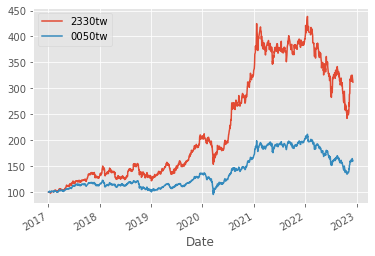

In [111]:
import matplotlib.pyplot as plt
import ffn
import pandas as pd 

#################
#輸入回測之資產 (需要至Yahoo財經查看代碼)

##範例1
#asset = "1101.TW,1102.TW,1215.TW,3430.TWO"

##範例2
#asset = "QQQ,TQQQ,SPY"

##回測資產輸入
asset ="2330.TW,0050.TW"

#################

prices = ffn.get(asset,start='2017-01-01' )#,itot,gld,ivv,uso

prices.to_csv('大擂台用.csv',encoding="utf_8_sig")

prices.rebase().plot()  #畫每個資產走勢

# 創造資產組合

2330.TW,0050.TW [0.07749028 0.92250972]
2330.TW,0050.TW [0.43931734 0.56068266]
2330.TW,0050.TW [0.23027545 0.76972455]
2330.TW,0050.TW [0.81017315 0.18982685]
2330.TW,0050.TW [0.87789859 0.12210141]
2330.TW,0050.TW [0.90612679 0.09387321]
2330.TW,0050.TW [0.77421808 0.22578192]
2330.TW,0050.TW [0.6827352 0.3172648]
2330.TW,0050.TW [0.44537034 0.55462966]
2330.TW,0050.TW [0.7532342 0.2467658]


stats可以使用參數
Index(['avg_down_month', 'avg_drawdown', 'avg_drawdown_days', 'avg_up_month',
       'best_day', 'best_month', 'best_year', 'cagr', 'calmar', 'daily_kurt',
       'daily_mean', 'daily_sharpe', 'daily_skew', 'daily_sortino',
       'daily_vol', 'five_year', 'incep', 'max_drawdown', 'monthly_kurt',
       'monthly_mean', 'monthly_sharpe', 'monthly_skew', 'monthly_sortino',
       'monthly_vol', 'mtd', 'one_year', 'pos_month_perc', 'rf', 'six_month',
       'ten_year', 'three_month', 'three_year', 'total_return',
       'twelve_month_win_perc', 'win_year_perc', 'worst_day', 'worst_month

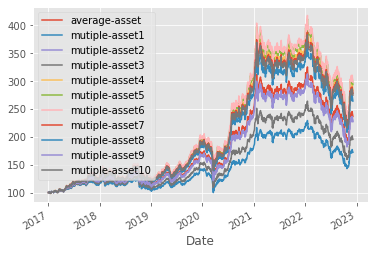

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


strategies = {}

"""
asset_per = np.zeros((int(len(prices.columns)),int(len(prices.columns))), dtype=float)
for num in range(0,len(prices.columns)) :
    asset_per[num][num] = 1 
    strategies[prices.columns[num]] = (prices.rebase() * asset_per[num]).mean(axis=1).rebase()
"""
strategies['average-asset'] = (prices.rebase() * (np.full(len(prices.columns),1/len(prices.columns)))).mean(axis=1).rebase()

average = np.full(len(prices.columns),1/len(prices.columns))
for i in range(0,10):
    for _ in range(0,10000):
        random_folat = random.uniform(0.01, 0.05)
        random1 = random.randrange(len(prices.columns))
        random2 = random.randrange(len(prices.columns))
        if average[random2] - random_folat > 0:
            average[random1] = average[random1] + random_folat
            average[random2] = average[random2] - random_folat
    print(asset ,average)
    strategies['mutiple-asset' + str(i+1)] = (prices.rebase() * average).mean(axis=1).rebase()
strategies = pd.DataFrame(strategies)
strategies.plot()

#隱藏警告 並計算stats
import warnings
warnings.filterwarnings('ignore')

stats = strategies.calc_stats()
stats = pd.DataFrame(
    {
        name:pd.Series({key:getattr(pf, key) for key in dir(pf) if isinstance(getattr(pf, key), float)}, name=name) 
        for name,pf in stats.items()
    }).transpose()
print("\n")
print("stats可以使用參數")
print(stats.columns)


# 資產回測結果

年化報酬
0.165048728605111
最大回撤:
average-asset     -0.420615
mutiple-asset1    -0.376309
mutiple-asset2    -0.415932
mutiple-asset3    -0.396054
mutiple-asset4    -0.439449
mutiple-asset5    -0.442702
mutiple-asset6    -0.443987
mutiple-asset7    -0.437617
mutiple-asset8    -0.432587
mutiple-asset9    -0.416418
mutiple-asset10   -0.436512
Name: max_drawdown, dtype: float64
夏普值
average-asset      0.789715
mutiple-asset1     0.603180
mutiple-asset2     0.770492
mutiple-asset3     0.687621
mutiple-asset4     0.866229
mutiple-asset5     0.879365
mutiple-asset6     0.884552
mutiple-asset7     0.858825
mutiple-asset8     0.838469
mutiple-asset9     0.772490
mutiple-asset10    0.854356
Name: daily_sharpe, dtype: float64


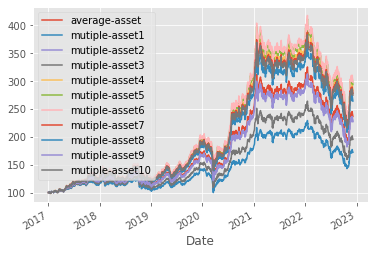

In [109]:
strategies.plot()
print("年化報酬")
print(stats.cagr.mean())
print("最大回撤:")
print(stats.max_drawdown)
print("夏普值")
print(stats.daily_sharpe)